In [1]:
# Initial imports
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import datetime
import numpy as np
#import tensorflow as tf

#  Import and read the file.
supply_df = pd.read_csv("./CAISO-ALL-SUPPLY-DATA.csv")
supply_df.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,7/5/21,11:50:00,7/5/21 11:50
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,8/18/20,16:25:00,8/18/20 16:25
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,8/18/20,15:55:00,8/18/20 15:55
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,8/18/20,15:50:00,8/18/20 15:50
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,8/18/20,15:40:00,8/18/20 15:40


In [2]:
supply_df['Sum'] = supply_df['Renewables'] + supply_df['Large hydro'] + supply_df['Imports'] + supply_df['Batteries'] + supply_df['Nuclear'] + supply_df['Coal'] + supply_df['Other'] + supply_df['Natural gas']



In [3]:
baby_df = supply_df['Time'].str.split(":", expand=True)
print(baby_df)

         0   1   2
0       11  50  00
1       16  25  00
2       15  55  00
3       15  50  00
4       15  40  00
...     ..  ..  ..
412947   2  35  00
412948   2  40  00
412949   2  45  00
412950   2  50  00
412951   2  55  00

[412952 rows x 3 columns]


In [4]:
baby_df[0] = baby_df[0].astype(int)
baby_df[1] = baby_df[1].astype(int)

In [5]:
baby_df= baby_df.drop([2],1)

In [6]:
# Rename columns and create years value for calculating demand_EV
baby_df = baby_df.rename(columns={baby_df.columns[0]: 'Hours'})
baby_df = baby_df.rename(columns={baby_df.columns[1]: 'Minutes'})

In [7]:
supply_df['Date'] = pd.to_datetime(supply_df['Date'])

#Create a new column for'Year'
baby_df['Year'] = supply_df['Date'].dt.year

#Convert to integers to be used in computations
baby_df['Year'] = baby_df['Year'].astype(int)



baby_df.head(100)

,Hours,Minutes,Year
0,11,50,2021
1,16,25,2020
2,15,55,2020
3,15,50,2020
4,15,40,2020
...,...,...,...
95,17,15,2020
96,17,15,2020
97,15,50,2020
98,15,50,2020


In [8]:
baby_df['DemandMW'] = 0.0

mask = (baby_df['Year'] == 2018) & (baby_df['Hours']<=6) | (baby_df['Hours']>=22)
mask1 = (baby_df['Year'] == 2019) & (baby_df['Hours']<=6) | (baby_df['Hours']>=22)
mask2 = (baby_df['Year'] == 2020) & (baby_df['Hours']<=6) | (baby_df['Hours']>=22)


baby_df.loc[mask,'DemandMW'] = 6.2356
baby_df.loc[mask1,'DemandMW'] = 8.2818
baby_df.loc[mask2,'DemandMW'] = 9.9174

In [9]:
#Create a date attribute for groupby function 
supply_df['Month-D.A'] = supply_df['Date'].dt.month

supply_df['Day-DA'] = supply_df['Date'].dt.day
supply_df['Month-D.A'] = supply_df['Month-D.A'].astype(str)
supply_df['Day-DA'] = supply_df['Day-DA'].astype(str)

supply_df['DateAttribute'] = supply_df['Month-D.A'] + supply_df['Day-DA']


supply_df

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Month-D.A,Day-DA,DateAttribute
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,2021-07-05,11:50:00,7/5/21 11:50,59874.0,7,5,75
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,2020-08-18,16:25:00,8/18/20 16:25,47279.0,8,18,818
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,2020-08-18,15:55:00,8/18/20 15:55,47243.0,8,18,818
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,2020-08-18,15:50:00,8/18/20 15:50,47210.0,8,18,818
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,2020-08-18,15:40:00,8/18/20 15:40,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:35:00,3/14/22 2:35,NaN,3,14,314
412948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:40:00,3/14/22 2:40,NaN,3,14,314
412949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:45:00,3/14/22 2:45,NaN,3,14,314
412950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:50:00,3/14/22 2:50,NaN,3,14,314


In [10]:
supply_df['Date'] = pd.to_datetime(supply_df['Date'])

In [11]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [12]:
supply_df['Date'] = supply_df['Date'].apply(fun)
supply_df.head(1300)

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Month-D.A,Day-DA,DateAttribute
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,186,11:50:00,7/5/21 11:50,59874.0,7,5,75
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,231,16:25:00,8/18/20 16:25,47279.0,8,18,818
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,231,15:55:00,8/18/20 15:55,47243.0,8,18,818
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,231,15:50:00,8/18/20 15:50,47210.0,8,18,818
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,231,15:40:00,8/18/20 15:40,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,232,12:55:00,8/19/20 12:55,43089.0,8,19,819
1296,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,233,12:55:00,8/20/20 12:55,43089.0,8,20,820
1297,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,232,19:15:00,8/19/20 19:15,43087.0,8,19,819
1298,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,233,19:15:00,8/20/20 19:15,43087.0,8,20,820


In [13]:
final_df = pd.merge(baby_df, supply_df, left_index=True, right_index=True, how='outer')

In [14]:
final_df.head()

,Hours,Minutes,Year,DemandMW,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Month-D.A,Day-DA,DateAttribute
0,11,50,2021,0.0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,186,11:50:00,7/5/21 11:50,59874.0,7,5,75
1,16,25,2020,0.0,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,231,16:25:00,8/18/20 16:25,47279.0,8,18,818
2,15,55,2020,0.0,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,231,15:55:00,8/18/20 15:55,47243.0,8,18,818
3,15,50,2020,0.0,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,231,15:50:00,8/18/20 15:50,47210.0,8,18,818
4,15,40,2020,0.0,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,231,15:40:00,8/18/20 15:40,47209.0,8,18,818


In [15]:
final_df= final_df.drop(['Renewables', 'Batteries', 'Large hydro', 'Imports', 'Other', 'Nuclear', 'Coal', 'DateTime'],1)
final_df.head(1000)

,Hours,Minutes,Year,DemandMW,Natural gas,Date,Time,Sum,Month-D.A,Day-DA,DateAttribute
0,11,50,2021,0.0,5568.0,186,11:50:00,59874.0,7,5,75
1,16,25,2020,0.0,26540.0,231,16:25:00,47279.0,8,18,818
2,15,55,2020,0.0,26159.0,231,15:55:00,47243.0,8,18,818
3,15,50,2020,0.0,26132.0,231,15:50:00,47210.0,8,18,818
4,15,40,2020,0.0,26015.0,231,15:40:00,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...,...
995,18,0,2019,0.0,19813.0,238,18:00:00,43499.0,8,26,826
996,18,0,2019,0.0,19813.0,239,18:00:00,43499.0,8,27,827
997,15,20,2020,0.0,23554.0,228,15:20:00,43499.0,8,15,815
998,17,40,2018,0.0,18174.0,208,17:40:00,43497.0,7,27,727


In [16]:
supply_df.dtypes

Renewables       float64
Natural gas      float64
Large hydro      float64
Imports          float64
Batteries        float64
Nuclear          float64
Coal             float64
Other            float64
Date               int64
Time              object
DateTime          object
Sum              float64
Month-D.A         object
Day-DA            object
DateAttribute     object
dtype: object

In [17]:
final_df= final_df.drop(['Time'],1)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

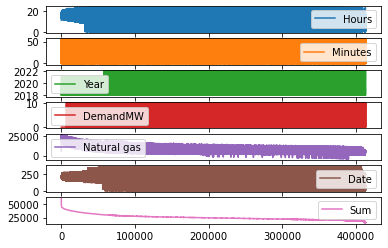

In [19]:
axes = final_df.plot.line(subplots=True)

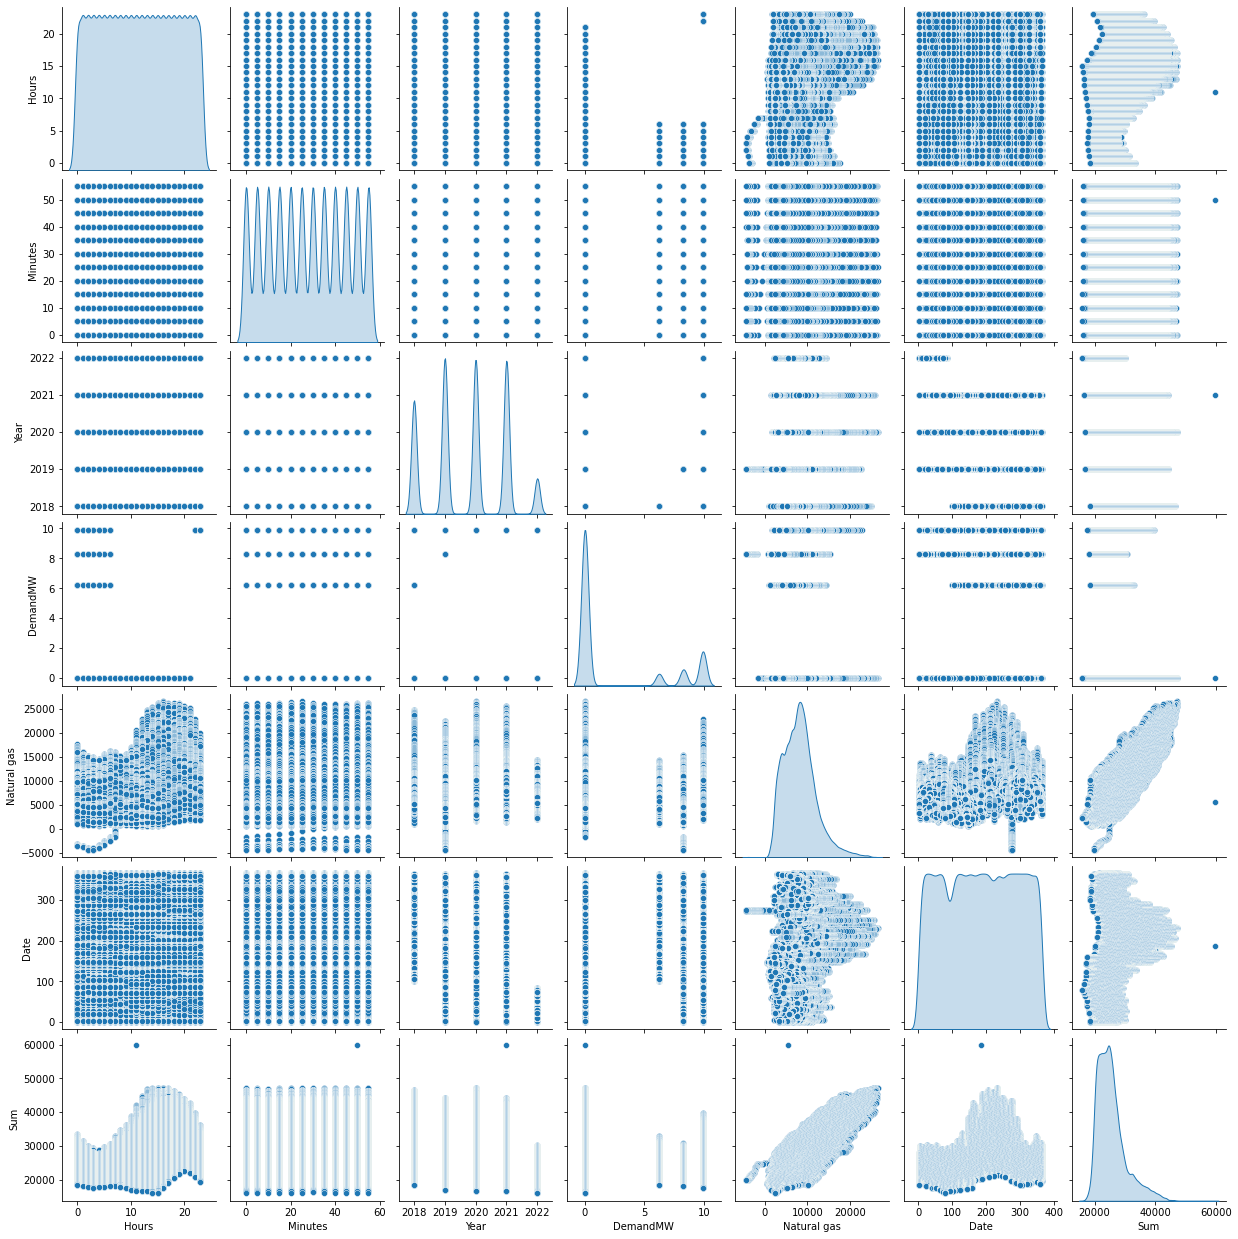

In [20]:
import seaborn as sns
sns.pairplot(data=final_df, diag_kind='kde')

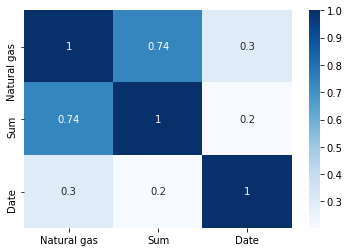

In [21]:
sns.heatmap(final_df[['Natural gas','Sum', 'Date']].corr(), cmap='Blues', annot=True)
plt.show()

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(final_df[['Natural gas','Sum']])
final_df[['Natural gas','Sum']] = imputer.transform(final_df[['Natural gas','Sum']])
final_df

,Hours,Minutes,Year,DemandMW,Natural gas,Date,Sum,Month-D.A,Day-DA,DateAttribute
0,11,50,2021,0.0,5568.0,186,59874.0,7,5,75
1,16,25,2020,0.0,26540.0,231,47279.0,8,18,818
2,15,55,2020,0.0,26159.0,231,47243.0,8,18,818
3,15,50,2020,0.0,26132.0,231,47210.0,8,18,818
4,15,40,2020,0.0,26015.0,231,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...
412947,2,35,2022,0.0,7891.0,73,24551.0,3,14,314
412948,2,40,2022,0.0,7891.0,73,24551.0,3,14,314
412949,2,45,2022,0.0,7891.0,73,24551.0,3,14,314
412950,2,50,2022,0.0,7891.0,73,24551.0,3,14,314


In [23]:
final_df= final_df.drop(['Year', 'DemandMW', 'Month-D.A', 'Day-DA', 'DateAttribute'],1)

In [24]:
# Create our features
X = final_df.drop("Natural gas", axis = 1)

# Create our target
y = final_df.loc[:, 'Natural gas'].copy()

In [25]:
final_df.isnull().values.any()

False

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(model.predict(X_train))


[ 6959.86577591 14844.84124836  7950.12173923 ...  8554.45616826
  9093.89595198  9833.69617641]


In [29]:
print(training_score)

0.5690242668873742


In [30]:
print(testing_score)

0.5705012639915177


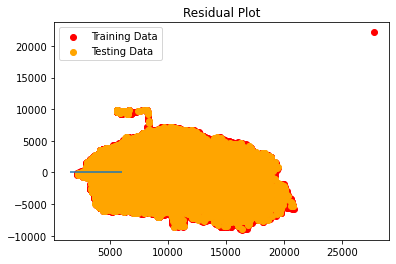

In [31]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="red", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=6000, xmax=1500)
plt.title("Residual Plot")
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5693226987782648


Predicting Future Natural Gas Demand

In [71]:
df2030 = pd.read_csv("./CAISO-ALL-SUPPLY-DATA.csv")
df2030.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,7/5/21,11:50:00,7/5/21 11:50
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,8/18/20,16:25:00,8/18/20 16:25
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,8/18/20,15:55:00,8/18/20 15:55
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,8/18/20,15:50:00,8/18/20 15:50
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,8/18/20,15:40:00,8/18/20 15:40


In [72]:
df2030['Sum'] = df2030['Renewables'] + df2030['Large hydro'] + df2030['Imports'] + df2030['Batteries'] + df2030['Nuclear'] + df2030['Coal'] + df2030['Other'] + df2030['Natural gas']

In [73]:
other_df = df2030['Time'].str.split(":", expand=True)
print(other_df)

         0   1   2
0       11  50  00
1       16  25  00
2       15  55  00
3       15  50  00
4       15  40  00
...     ..  ..  ..
412947   2  35  00
412948   2  40  00
412949   2  45  00
412950   2  50  00
412951   2  55  00

[412952 rows x 3 columns]


In [74]:
#Format the baby_df into int.
other_df[0] = other_df[0].astype(int)
other_df[1] = other_df[1].astype(int)
#Clean baby_df
other_df= other_df.drop([2],1)

# Rename columns and create years value for calculating demand_EV
other_df = other_df.rename(columns={other_df.columns[0]: 'Hours'})
other_df = other_df.rename(columns={other_df.columns[1]: 'Minutes'})
other_df

,Hours,Minutes
0,11,50
1,16,25
2,15,55
3,15,50
4,15,40
...,...,...
412947,2,35
412948,2,40
412949,2,45
412950,2,50


In [75]:
df2030['Date'] = pd.to_datetime(df2030['Date'])

#Create a new column for'Year'
other_df['Year'] = df2030['Date'].dt.year
#Convert to integers to be used in computations
other_df['Year'] = other_df['Year'].astype(int)

other_df.head(100)

,Hours,Minutes,Year
0,11,50,2021
1,16,25,2020
2,15,55,2020
3,15,50,2020
4,15,40,2020
...,...,...,...
95,17,15,2020
96,17,15,2020
97,15,50,2020
98,15,50,2020


In [76]:
#Make a date string column 
date_df = pd.DataFrame()
df2030['Date1']=df2030['Date'].astype(str)

date_df = df2030['Date1'].str.split("-", expand=True)
date_df['DateAttribute'] = date_df[1] + date_df[2]
date_df = date_df.drop([0,1,2],1)

In [77]:
calc_df = pd.merge(other_df, date_df, left_index=True, right_index=True, how='outer')
calc_df.head(-5)

,Hours,Minutes,Year,DateAttribute
0,11,50,2021,0705
1,16,25,2020,0818
2,15,55,2020,0818
3,15,50,2020,0818
4,15,40,2020,0818
...,...,...,...,...
412942,2,10,2022,0314
412943,2,15,2022,0314
412944,2,20,2022,0314
412945,2,25,2022,0314


In [78]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [79]:
df2030['Date'] = df2030['Date'].apply(fun)
df2030.head(1300)

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Date1
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,186,11:50:00,7/5/21 11:50,59874.0,2021-07-05
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,231,16:25:00,8/18/20 16:25,47279.0,2020-08-18
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,231,15:55:00,8/18/20 15:55,47243.0,2020-08-18
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,231,15:50:00,8/18/20 15:50,47210.0,2020-08-18
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,231,15:40:00,8/18/20 15:40,47209.0,2020-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,232,12:55:00,8/19/20 12:55,43089.0,2020-08-19
1296,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,233,12:55:00,8/20/20 12:55,43089.0,2020-08-20
1297,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,232,19:15:00,8/19/20 19:15,43087.0,2020-08-19
1298,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,233,19:15:00,8/20/20 19:15,43087.0,2020-08-20


In [80]:
df2030 = df2030.drop(['Date1'],1)
df2030final = pd.merge(df2030, calc_df, left_index=True, right_index=True, how='outer')
df2030final
df2030final['DateTime'] = pd.to_datetime(df2030final['DateTime'])

In [81]:
df1= pd.DataFrame()
df1 = df2030final.groupby(['DateAttribute','Time'])['Sum'].agg('mean')
df1 = df1.reset_index()
df1 = df1.rename(columns={df1.columns[2]: 'AvgSUM(3yr)'}).round(2)
df2 = df1.copy

print(len(df1))
df1.dtypes

105408


DateAttribute     object
Time              object
AvgSUM(3yr)      float64
dtype: object

In [82]:
df1['Date1']= "2020" + df1['DateAttribute']
df1['pDateTime'] = df1['Date1'] +" " +df1['Time']
df1['Date2']= pd.to_datetime(df1['pDateTime'])
df1=df1.set_index('Date2')       
                                            
df1=df1.sort_index(ascending=True)
df1=df1.reset_index()
ev_df2=df1.drop(['DateAttribute','Date1','pDateTime','Time'],1)

In [83]:
df1 = df1.drop(df1.index[16992:17280])
df1 = df1.reset_index(drop=True)
print(len(df1))
df1

105120


,Date2,DateAttribute,Time,AvgSUM(3yr),Date1,pDateTime
0,2020-01-01 00:00:00,0101,0:00:00,23008.50,20200101,20200101 0:00:00
1,2020-01-01 00:05:00,0101,0:05:00,22992.00,20200101,20200101 0:05:00
2,2020-01-01 00:10:00,0101,0:10:00,22944.25,20200101,20200101 0:10:00
3,2020-01-01 00:15:00,0101,0:15:00,22891.00,20200101,20200101 0:15:00
4,2020-01-01 00:20:00,0101,0:20:00,22834.25,20200101,20200101 0:20:00
...,...,...,...,...,...,...
105115,2020-12-31 23:35:00,1231,23:35:00,23266.50,20201231,20201231 23:35:00
105116,2020-12-31 23:40:00,1231,23:40:00,23171.50,20201231,20201231 23:40:00
105117,2020-12-31 23:45:00,1231,23:45:00,23105.00,20201231,20201231 23:45:00
105118,2020-12-31 23:50:00,1231,23:50:00,23031.75,20201231,20201231 23:50:00


In [84]:
df1= df1.drop(['DateAttribute', 'Date1', 'pDateTime'],1)
df1.head(1000)

,Date2,Time,AvgSUM(3yr)
0,2020-01-01 00:00:00,0:00:00,23008.50
1,2020-01-01 00:05:00,0:05:00,22992.00
2,2020-01-01 00:10:00,0:10:00,22944.25
3,2020-01-01 00:15:00,0:15:00,22891.00
4,2020-01-01 00:20:00,0:20:00,22834.25
...,...,...,...
995,2020-01-04 10:55:00,10:55:00,22957.50
996,2020-01-04 11:00:00,11:00:00,22929.25
997,2020-01-04 11:05:00,11:05:00,22828.50
998,2020-01-04 11:10:00,11:10:00,22846.00


In [85]:
time_df = df1['Time'].str.split(":", expand=True)
time_df.head()

,0,1,2
0,0,00,00
1,0,05,00
2,0,10,00
3,0,15,00
4,0,20,00


In [86]:
#Format the baby_df into int.
time_df[0] = time_df[0].astype(int)
time_df[1] = time_df[1].astype(int)


# Rename columns and create years value for calculating demand_EV
time_df = time_df.rename(columns={time_df.columns[0]: 'Hours'})
time_df = time_df.rename(columns={time_df.columns[1]: 'Minutes'})


In [87]:
final_demand_df = pd.merge(time_df, df1, left_index=True, right_index=True, how='outer')
final_demand_df.head()

,Hours,Minutes,2,Date2,Time,AvgSUM(3yr)
0,0,0,00,2020-01-01 00:00:00,0:00:00,23008.50
1,0,5,00,2020-01-01 00:05:00,0:05:00,22992.00
2,0,10,00,2020-01-01 00:10:00,0:10:00,22944.25
3,0,15,00,2020-01-01 00:15:00,0:15:00,22891.00
4,0,20,00,2020-01-01 00:20:00,0:20:00,22834.25


In [88]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [89]:
final_demand_df['Date2'] = final_demand_df['Date2'].apply(fun)

In [90]:
final_demand_df= final_demand_df.drop(['Time', 2],1)
df1.head(1000)

,Date2,Time,AvgSUM(3yr)
0,2020-01-01 00:00:00,0:00:00,23008.50
1,2020-01-01 00:05:00,0:05:00,22992.00
2,2020-01-01 00:10:00,0:10:00,22944.25
3,2020-01-01 00:15:00,0:15:00,22891.00
4,2020-01-01 00:20:00,0:20:00,22834.25
...,...,...,...
995,2020-01-04 10:55:00,10:55:00,22957.50
996,2020-01-04 11:00:00,11:00:00,22929.25
997,2020-01-04 11:05:00,11:05:00,22828.50
998,2020-01-04 11:10:00,11:10:00,22846.00


In [91]:
final_demand_df.head(1000)

,Hours,Minutes,Date2,AvgSUM(3yr)
0,0,0,1,23008.50
1,0,5,1,22992.00
2,0,10,1,22944.25
3,0,15,1,22891.00
4,0,20,1,22834.25
...,...,...,...,...
995,10,55,4,22957.50
996,11,0,4,22929.25
997,11,5,4,22828.50
998,11,10,4,22846.00


In [92]:
final_demand_df = final_demand_df.rename(columns={'Date2': 'Day', 'AvgSUM(3yr)': 'AvgSum'})

In [93]:
final_demand_df.head()

,Hours,Minutes,Day,AvgSum
0,0,0,1,23008.50
1,0,5,1,22992.00
2,0,10,1,22944.25
3,0,15,1,22891.00
4,0,20,1,22834.25


In [94]:
len(final_demand_df)

105120

In [95]:
mask = (final_demand_df['Hours'] < 7) | (final_demand_df['Hours'] > 21)
final_demand_df.loc[mask, 'AvgSum'] += 106.68

In [96]:
final_demand_df.head(5000)

,Hours,Minutes,Day,AvgSum
0,0,0,1,23115.18
1,0,5,1,23098.68
2,0,10,1,23050.93
3,0,15,1,22997.68
4,0,20,1,22940.93
...,...,...,...,...
4995,8,15,18,24005.00
4996,8,20,18,23962.25
4997,8,25,18,23849.75
4998,8,30,18,23803.25


In [97]:
print(len(final_demand_df.loc[final_demand_df['AvgSum'] < 0]))
print(final_demand_df['AvgSum'].mean())
print(final_df['Sum'].mean())


0
25488.596306593685
25472.23918276216


In [98]:
final_demand_df.head()

,Hours,Minutes,Day,AvgSum
0,0,0,1,23115.18
1,0,5,1,23098.68
2,0,10,1,23050.93
3,0,15,1,22997.68
4,0,20,1,22940.93


In [99]:
final_demand_df['Predicted 2030 NatGas'] = model.predict(final_demand_df)

In [100]:
len(final_demand_df)

105120

In [101]:
df2030.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,186,11:50:00,7/5/21 11:50,59874.0
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,231,16:25:00,8/18/20 16:25,47279.0
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,231,15:55:00,8/18/20 15:55,47243.0
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,231,15:50:00,8/18/20 15:50,47210.0
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,231,15:40:00,8/18/20 15:40,47209.0


In [102]:
l = final_df["Natural gas"].median()
p = final_demand_df["Predicted 2030 NatGas"].median()
print((((p/l)-1))*100)

-2.7456195694025465


In [103]:
print(p-l)

-216.65684022155529


In [104]:
(-1033.4518453045357/l)*100

-13.09658909269466

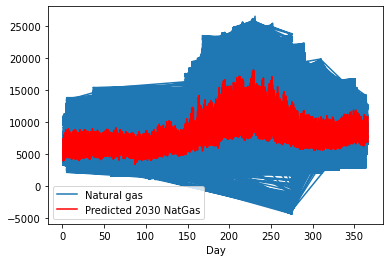

In [106]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
# gca stands for 'get current axis'
ax = plt.gca()

final_df.plot(kind='line',x='Date',y='Natural gas',ax=ax)
final_demand_df.plot(kind='line',x='Day',y='Predicted 2030 NatGas', color='red', ax=ax)
    
    # adjust the y axis scale.
#ax.locator_params('y', nbins=5)
    # adjust the x axis scale.
#plt.locator_params('x', nbins=20)
    # show the final figure.
plt.show()  
